---
# Welcome to CE880
### This is your week-4 : Problem notebook

For this problem set, we'll be using the Jupyter notebook and please upload this notebook to [Google Colab](https://colab.research.google.com/). 

### Task: Complete all the three questions given as follows:

In [33]:
# install sklearn package if you are using local computer and if you are using Google Coalb then skip this step
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles, make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
scaler = StandardScaler()

---
## Question 1: 
We have already loaded `moon` data for you using `make_moons` function. 

Write a code to perform `k-means` clustering on `scaled_features` variable and return `silhouette_score` as an output

In [44]:
# Let's make two moons, where n is the number of samples
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
# fit_transform() method is basically the combination of fit method and transform method, 
# it is equivalent to fit().transform(). This method performs fit and transform on the 
# input data at a single time and converts the data points. 
# If we use fit and transform separate when we need both then it 
# will decrease the efficiency of the model so we use fit_transform() 
# which will do both the work.
scaled_features = scaler.fit_transform(features)
myscore = []

#print(features,true_labels)
def myScore_kmean(scaled_features):
    """Write code to perform k-means clustering and print silhouette_score"""
    # YOUR CODE HERE
    for i in range(2,10):
      # Create a KMeans clustering object
      kmeans_clustering = KMeans(n_clusters=i, random_state=42)
      # Fit the data
      kmeans_clustering.fit(scaled_features)
      # Get the labels
      labels = kmeans_clustering.labels_
      # Get the score
      myscore = silhouette_score(scaled_features,labels)
    return myscore
    raise NotImplementedError()

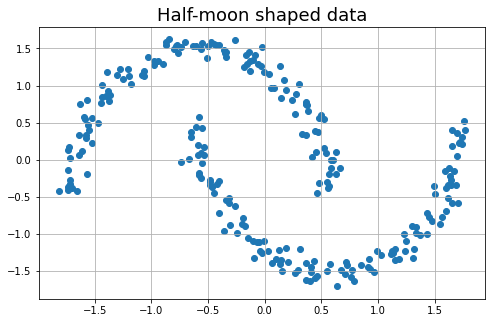

In [45]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(scaled_features[:,0],scaled_features[:,1])
plt.savefig('CLUSTER_MOON.png', dpi=300)
plt.show()

In [46]:
# Check you solution by running this cell
import math
assert math.isclose(myScore_kmean(scaled_features), 0.5, rel_tol=0.10)

---
## Question 2: 

Write a code to perform `DBSCAN` clustering algorithm on `scaled_features` and return `silhouette_score` as an output. Please set the `eps` = 0.2 and `min_samples` = 5

In [51]:

# Let's make two moons, where n is the number of samples
from sklearn.datasets import make_moons
features, true_labels =  make_moons(n_samples=250, noise=.1)

def myScore_DBSCAN(scaled_features):
    """Write code to perform DBSCAN algorithm and print silhouette_score"""
    # YOUR CODE HERE
    dbscan_cluster = DBSCAN(eps=0.2, min_samples=5)
    # Fit the data
    dbscan_cluster.fit(scaled_features)
    # Get the labels
    labels = dbscan_cluster.labels_
    # Get the score
    sil_score = silhouette_score(scaled_features, labels)
    return sil_score

    raise NotImplementedError()

In [52]:
# Check you solution by running this cell
assert math.isclose(myScore_DBSCAN(scaled_features), 0.2, rel_tol=0.10)

## Question 3: 

Complete this code perform `PCA`  on `iris data` and return `explained_variance_ratio_` as an output for the first two principal components (PCs)

In [64]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
    
def myPCA(x):
    """Complete this code return the explained variance ratio for the first two prinical 
    components after doing PCA on x """
    # YOUR CODE HERE
    # Create the PCA object
    myPCA = PCA(n_components=2)
    # Fit the data
    myPCA.fit(x)
    # Get the explained variance ratio
    explained_variance_ratio_ = myPCA.explained_variance_ratio_

    return explained_variance_ratio_
    raise NotImplementedError()

In [65]:
# Check you solution by running this cell
x= myPCA(x)
y = [0.7277045209380135, 0.23030523267680633]
np.testing.assert_allclose(x, y, rtol=1e-5, atol=0)
